In [10]:
!CUDA_VISIBLE_DEVICES=4,5 torchrun --nproc_per_node=2 --master_port=29501 module6/train.py --backbone_lr=1e-5


W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] 
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] *****************************************
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] *****************************************
0
1
Epoch: 1 Train loss: 16.587 Aux train loss: 10.004 Val loss: 7.199 Aux val loss: 4.150 Train MAE: 74.164 Val MAE: 87.292 Epoch time: 183.008 seconds best
Epoch: 2 Train loss: 16.938 Aux train loss: 10.146 Val loss: 6.783 Aux val loss: 4.069 Train MAE: 69.304 Val MAE: 46.918 Epoch time: 184.391 seconds best
Epoch: 3 Train loss: 16.685 Aux train loss: 10.006 Val loss: 6.732 Aux val loss: 4.066 Train MAE:

In [11]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module6/evaluate.py

/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
196       22.1145        
173       22.2931        
199       22.6969        
189       23.2131        
194       23.4490        

Validation MAE:
Epoch     MAE            
-------------------------
185       21.1110        
197       21.2777        
196       21.6372        
175       22.1514        
165       22.3437        


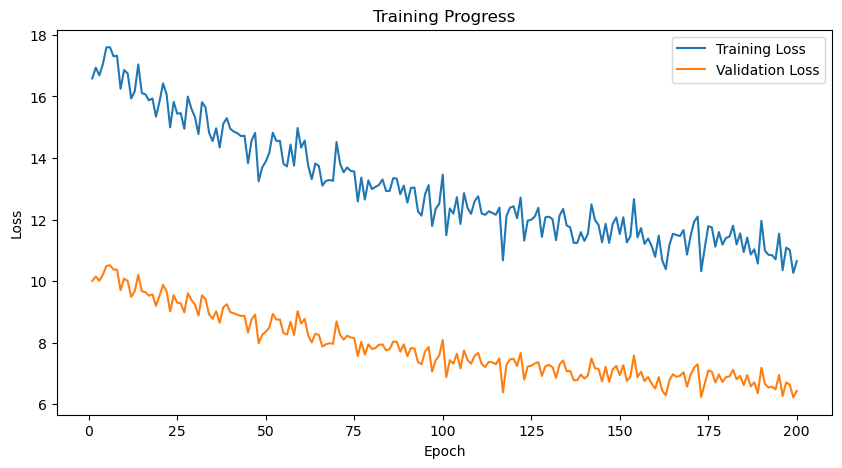

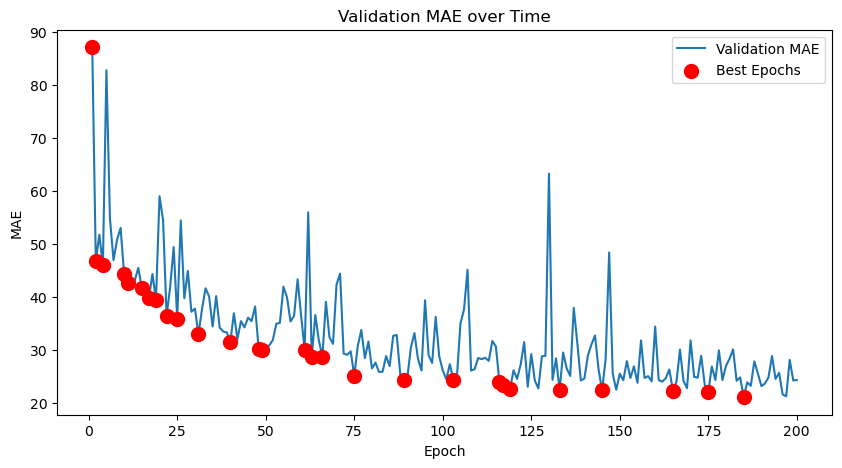

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_low_2.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=0 --model_name=efficient_low_2_freeze


W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] 
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] *****************************************
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] *****************************************
3
2
1
0
Epoch: 1 Train loss: 9.395 Aux train loss: 5.655 Val loss: 4.170 Aux val loss: 2.479 Train MAE: 76.461 Val MAE: 72.350 Epoch time: 89.415 seconds best
Epoch: 2 Train loss: 9.358 Aux train loss: 5.608 Val loss: 4.133 Aux val loss: 2.468 Train MAE: 68.583 Val MAE: 69.259 Epoch time: 93.313 seconds best
Epoch: 3 Train loss: 9.813 Aux train loss: 5.886 Val loss: 4.091 Aux val loss: 2.472 Train MAE: 68.575 

In [3]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module6/evaluate.py --backbone_lr=0 --model_name=efficient_low_2_freeze

/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
192       32.0241        
199       32.7996        
154       32.9099        
167       33.2126        
160       33.2576        

Validation MAE:
Epoch     MAE            
-------------------------
177       3.6783         
190       3.7041         
180       3.7271         
144       3.7792         
109       3.8611         


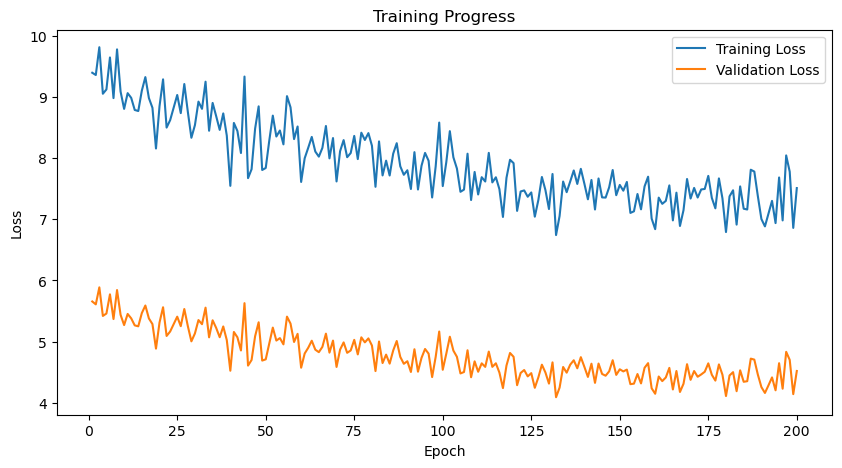

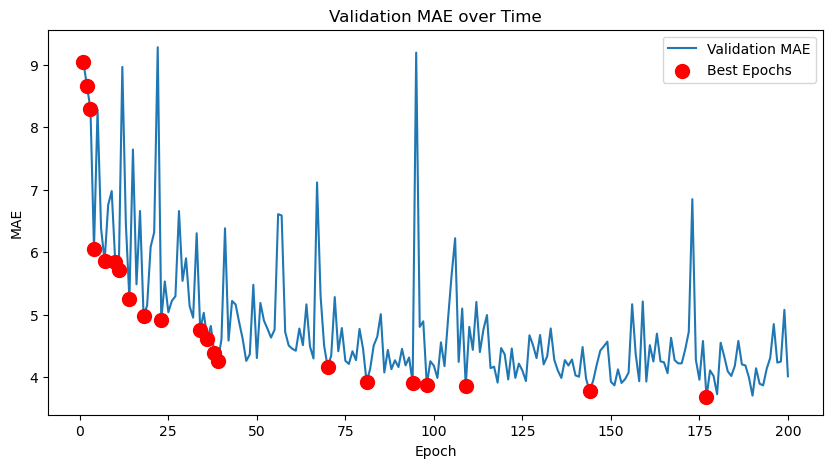

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_low_2_freeze.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=1e-5 \
--model_name=efficient_unfreeze_pre_norm --pre_norm


W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] 
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] *****************************************
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] *****************************************
3
0
2
1
Epoch: 1 Train loss: 9.500 Aux train loss: 5.713 Val loss: 4.184 Aux val loss: 2.508 Train MAE: 81.026 Val MAE: 66.889 Epoch time: 108.474 seconds best
Epoch: 2 Train loss: 9.416 Aux train loss: 5.687 Val loss: 4.292 Aux val loss: 2.509 Train MAE: 71.462 Val MAE: 101.370 Epoch time: 109.537 seconds 
Epoch: 3 Train loss: 9.830 Aux train loss: 5.877 Val loss: 4.052 Aux val loss: 2.431 Train MAE: 68.773 V

In [2]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 --master_port=29501 module6/evaluate.py --backbone_lr=1e-5 \
--model_name=efficient_unfreeze_pre_norm --pre_norm


/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
192       25.4159        
190       25.5966        
196       26.1166        
191       26.5514        
175       26.8460        

Validation MAE:
Epoch     MAE            
-------------------------
150       2.9331         
200       3.0093         
168       3.0834         
165       3.0982         
194       3.1090         


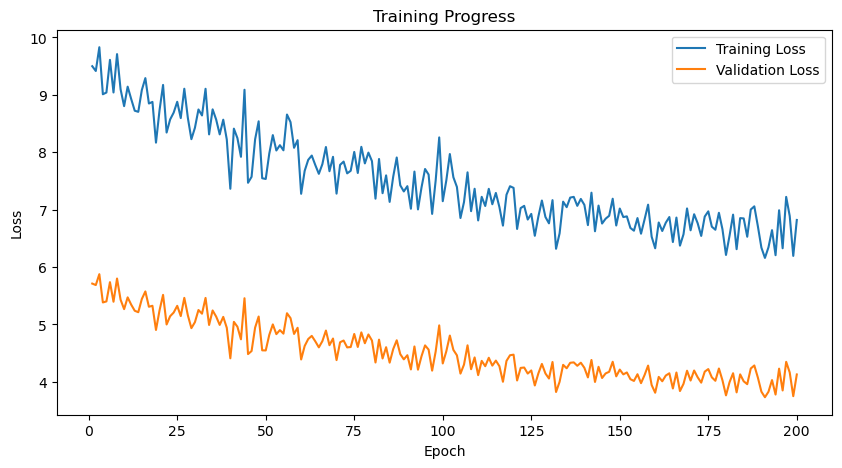

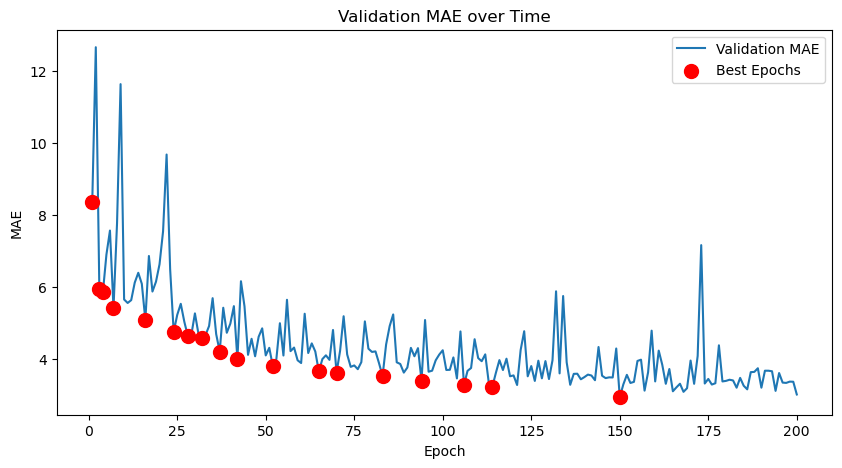

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_unfreeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=1e-5 \
--model_name=efficient2_unfreeze_pre_norm --pre_norm


W0225 15:26:46.170000 1313664 site-packages/torch/distributed/run.py:793] 
W0225 15:26:46.170000 1313664 site-packages/torch/distributed/run.py:793] *****************************************
W0225 15:26:46.170000 1313664 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0225 15:26:46.170000 1313664 site-packages/torch/distributed/run.py:793] *****************************************
2
0
1
3
Epoch: 1 Train loss: 10.605 Aux train loss: 6.179 Val loss: 4.104 Aux val loss: 2.515 Train MAE: 85.553 Val MAE: 49.775 Epoch time: 104.701 seconds best
Epoch: 2 Train loss: 9.560 Aux train loss: 5.748 Val loss: 4.097 Aux val loss: 2.452 Train MAE: 67.409 Val MAE: 49.212 Epoch time: 101.134 seconds best
Epoch: 3 Train loss: 9.716 Aux train loss: 5.822 Val loss: 4.043 Aux val loss: 2.460 Train MAE: 

In [2]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 --master_port=29501 module6/evaluate.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient2_unfreeze_pre_norm --pre_norm


Val set MAE: 17.64 RMSE: 44.01
Test set MAE: 20.27 RMSE: 103.80



5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
193       17.6290        
197       17.8447        
177       18.0592        
192       18.2887        
188       18.3610        

Validation MAE:
Epoch     MAE            
-------------------------
176       2.2102         
196       2.2729         
188       2.3088         
177       2.3456         
194       2.3649         


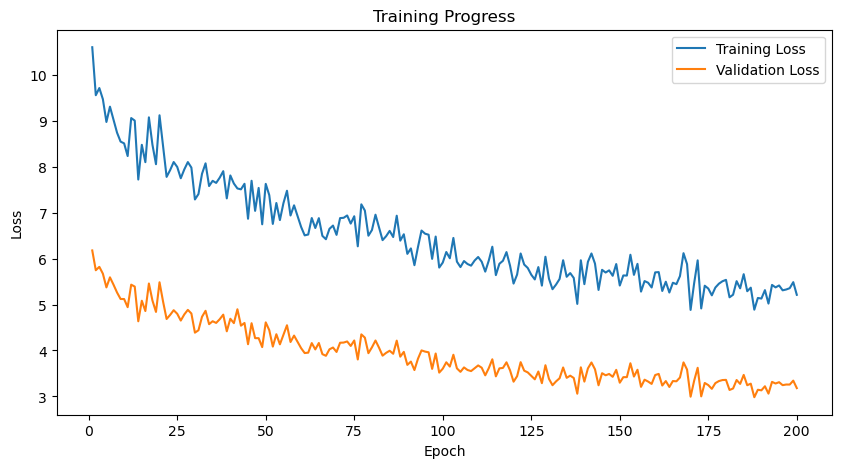

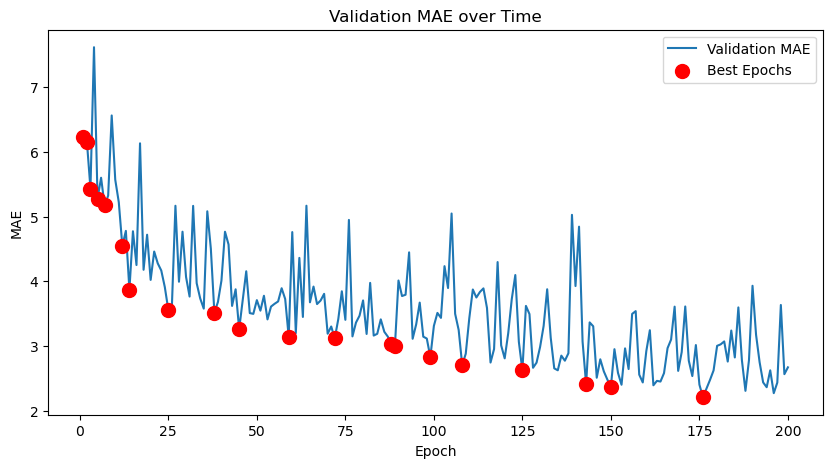

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient2_unfreeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [4]:
df


Epoch  Training Loss  Validation Loss  Aux train loss  Aux val loss  \
0        1      10.605438         6.179155        2.515067      4.104104   
1        2       9.559877         5.747721        2.451760      4.097395   
2        3       9.716309         5.821710        2.459664      4.043197   
3        4       9.473295         5.672877        2.430807      4.084558   
4        5       8.977232         5.374109        2.395266      3.978266   
..     ...            ...              ...             ...           ...   
195    196       5.310525         3.244722        1.680617      2.746477   
196    197       5.328220         3.258437        1.679984      2.756732   
197    198       5.357154         3.257769        1.696183      2.794520   
198    199       5.488307         3.343119        1.699013      2.755908   
199    200       5.212547         3.180409        1.661488      2.719468   

     Train MAE  Validation MAE Best Epoch  
0    85.552952        6.221932        Yes  
1    67.409389        6.151455        Yes  
2    61.881721        5.433971        Yes  
3    61.662719        7.616255         No  
4    58.289727        5.278294        Yes  
..         ...             ...        ...  
195  20.454380        2.272886         No  
196  17.844670        2.436478         No  
197  19.887292        3.634977         No  
198  19.119818        2.566481         No  
199  18.439883        2.671834         No  

[200 rows x 8 columns]

In [5]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=0 \
--model_name=efficient3_freeze_pre_norm --pre_norm


W0227 19:31:21.931000 2877266 site-packages/torch/distributed/run.py:793] 
W0227 19:31:21.931000 2877266 site-packages/torch/distributed/run.py:793] *****************************************
W0227 19:31:21.931000 2877266 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0227 19:31:21.931000 2877266 site-packages/torch/distributed/run.py:793] *****************************************
0
2
1
3
Epoch: 1 Train loss: 10.637 Aux train loss: 6.137 Val loss: 4.130 Aux val loss: 2.487 Train MAE: 89.495 Val MAE: 56.300 Epoch time: 95.047 seconds best
Epoch: 2 Train loss: 9.588 Aux train loss: 5.702 Val loss: 4.111 Aux val loss: 2.470 Train MAE: 67.761 Val MAE: 50.563 Epoch time: 90.012 seconds best
Epoch: 3 Train loss: 9.814 Aux train loss: 5.859 Val loss: 4.129 Aux val loss: 2.467 Train MAE: 63

In [6]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient3_freeze_pre_norm --pre_norm


W0228 08:15:21.008000 3354703 site-packages/torch/distributed/run.py:793] 
W0228 08:15:21.008000 3354703 site-packages/torch/distributed/run.py:793] *****************************************
W0228 08:15:21.008000 3354703 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0228 08:15:21.008000 3354703 site-packages/torch/distributed/run.py:793] *****************************************
Val set MAE: 24.20 RMSE: 64.88
Test set MAE: 24.68 RMSE: 96.99



5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
200       23.2799        
196       23.4602        
190       23.5255        
192       23.8485        
188       23.8520        

Validation MAE:
Epoch     MAE            
-------------------------
170       3.0250         
174       3.0400         
189       3.0466         
179       3.0674         
162       3.0804         


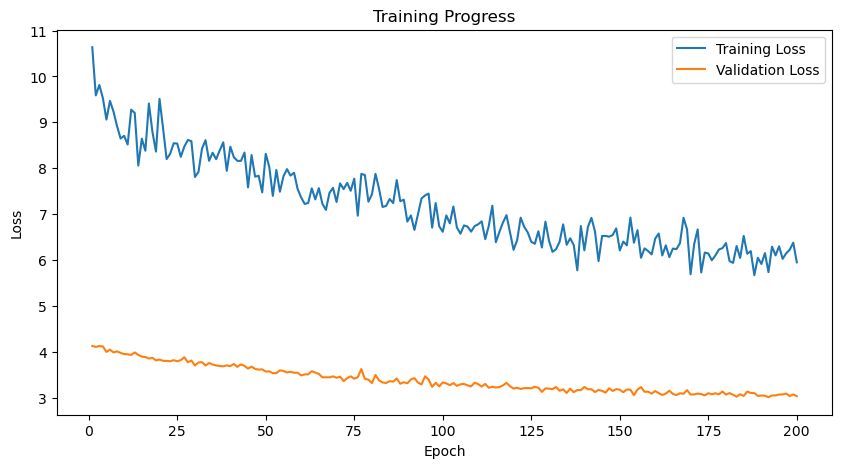

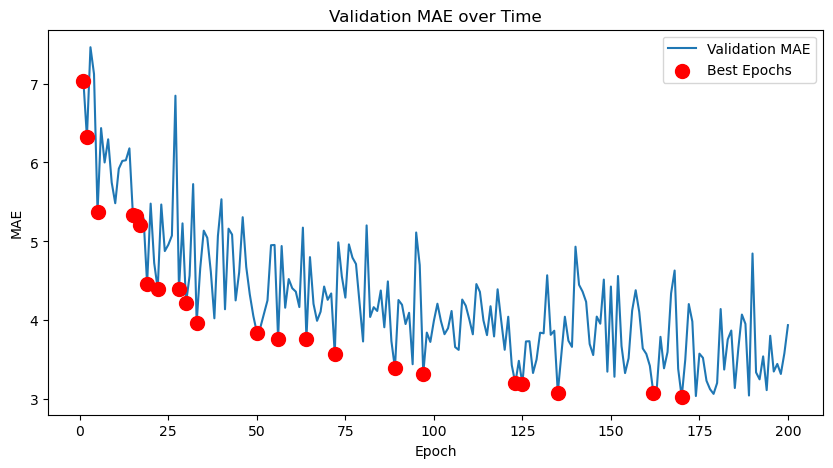

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient3_freeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [2]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module6/train.py --lr=5e-5 --backbone_lr=1e-5 \
--model_name=efficient4_freeze_pre_norm --pre_norm


W0228 10:54:54.563000 3361866 site-packages/torch/distributed/run.py:793] 
W0228 10:54:54.563000 3361866 site-packages/torch/distributed/run.py:793] *****************************************
W0228 10:54:54.563000 3361866 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0228 10:54:54.563000 3361866 site-packages/torch/distributed/run.py:793] *****************************************
3
0
2
1
Epoch: 1 Train loss: 10.760 Aux train loss: 6.099 Val loss: 4.121 Aux val loss: 2.465 Train MAE: 86.824 Val MAE: 57.103 Epoch time: 104.326 seconds best
Epoch: 2 Train loss: 9.499 Aux train loss: 5.680 Val loss: 4.094 Aux val loss: 2.453 Train MAE: 62.727 Val MAE: 50.304 Epoch time: 101.260 seconds best
Epoch: 3 Train loss: 9.684 Aux train loss: 5.801 Val loss: 4.023 Aux val loss: 2.423 Train MAE: 

In [3]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module6/evaluate.py --lr=5e-5 --backbone_lr=1e-5 \
--model_name=efficient4_freeze_pre_norm --pre_norm

Val set MAE: 18.75 RMSE: 50.00
Test set MAE: 19.35 RMSE: 97.60



5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
190       16.8776        
197       17.3967        
192       17.6648        
193       17.8911        
200       17.9151        

Validation MAE:
Epoch     MAE            
-------------------------
188       2.3527         
191       2.4021         
197       2.4034         
196       2.4351         
200       2.4713         


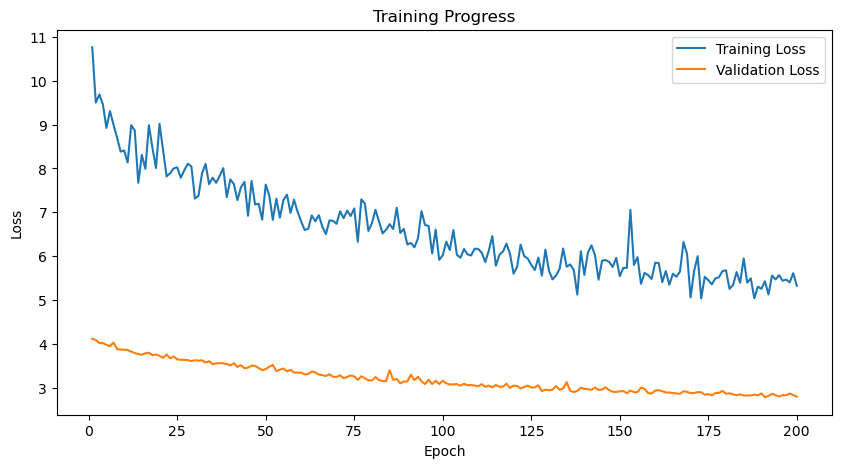

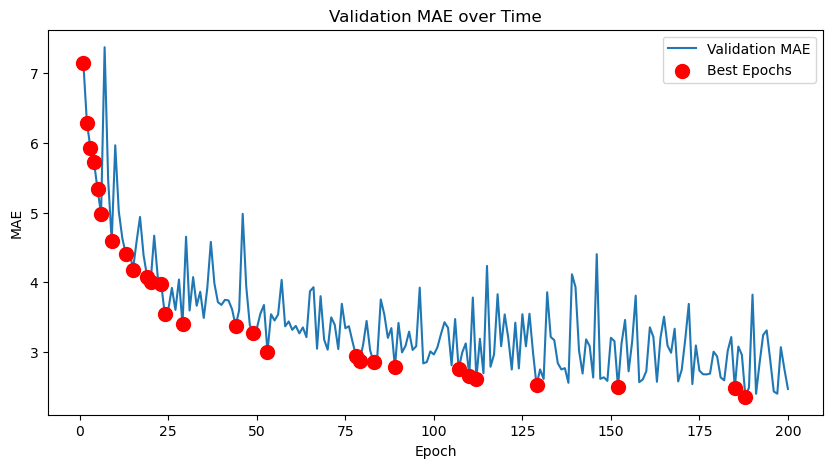

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient4_freeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [5]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module6/train.py --lr=1e-4 --backbone_lr=5e-6 \
--model_name=efficient5_unfreeze_pre_norm --pre_norm


W0301 09:28:25.743000 3844215 site-packages/torch/distributed/run.py:793] 
W0301 09:28:25.743000 3844215 site-packages/torch/distributed/run.py:793] *****************************************
W0301 09:28:25.743000 3844215 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0301 09:28:25.743000 3844215 site-packages/torch/distributed/run.py:793] *****************************************
3
0
2
1
Epoch: 1 Train loss: 10.719 Aux train loss: 6.177 Val loss: 4.172 Aux val loss: 2.515 Train MAE: 93.628 Val MAE: 57.007 Epoch time: 104.510 seconds best
Epoch: 2 Train loss: 9.532 Aux train loss: 5.743 Val loss: 4.102 Aux val loss: 2.467 Train MAE: 65.165 Val MAE: 49.807 Epoch time: 100.650 seconds best
Epoch: 3 Train loss: 9.770 Aux train loss: 5.851 Val loss: 4.155 Aux val loss: 2.486 Train MAE: 

In [6]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module6/evaluate.py --lr=1e-4 --backbone_lr=5e-6 \
--model_name=efficient5_unfreeze_pre_norm --pre_norm


W0301 15:12:18.156000 100467 site-packages/torch/distributed/run.py:793] 
W0301 15:12:18.156000 100467 site-packages/torch/distributed/run.py:793] *****************************************
W0301 15:12:18.156000 100467 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0301 15:12:18.156000 100467 site-packages/torch/distributed/run.py:793] *****************************************
Val set MAE: 18.75 RMSE: 46.42
Test set MAE: 20.87 RMSE: 94.00



5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
197       18.2078        
199       18.2289        
190       18.5019        
188       18.5562        
187       18.5909        

Validation MAE:
Epoch     MAE            
-------------------------
189       2.3438         
188       2.3745         
159       2.3750         
149       2.4847         
193       2.4992         


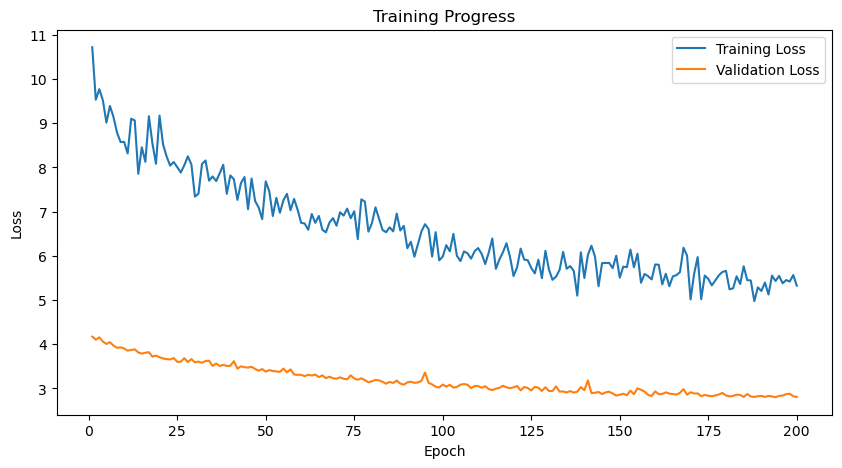

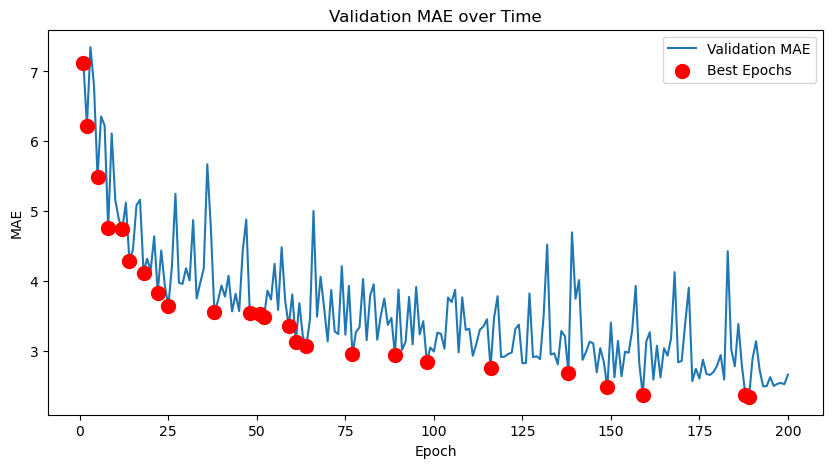

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient5_unfreeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module7/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient6_freeze_pre_norm --pre_norm


W0302 09:32:35.247000 110944 site-packages/torch/distributed/run.py:793] 
W0302 09:32:35.247000 110944 site-packages/torch/distributed/run.py:793] *****************************************
W0302 09:32:35.247000 110944 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0302 09:32:35.247000 110944 site-packages/torch/distributed/run.py:793] *****************************************
Loading GroundingDINO weights from pretrained_weights/groundingdino_swint_ogc.pth
/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.c

In [1]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module7/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient6_freeze_pre_norm --pre_norm

Loading GroundingDINO weights from pretrained_weights/groundingdino_swint_ogc.pth
/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experim

In [6]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module7/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient7_freeze_pre_norm --pre_norm


W0304 09:58:26.402000 577318 site-packages/torch/distributed/run.py:793] 
W0304 09:58:26.402000 577318 site-packages/torch/distributed/run.py:793] *****************************************
W0304 09:58:26.402000 577318 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0304 09:58:26.402000 577318 site-packages/torch/distributed/run.py:793] *****************************************
/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a 

In [7]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module7/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient7_freeze_pre_norm --pre_norm


/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(model_path, map_location="cpu")
Val 

In [8]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module7/train.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient8_freeze_pre_norm --pre_norm


W0304 15:11:46.895000 1029544 site-packages/torch/distributed/run.py:793] 
W0304 15:11:46.895000 1029544 site-packages/torch/distributed/run.py:793] *****************************************
W0304 15:11:46.895000 1029544 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0304 15:11:46.895000 1029544 site-packages/torch/distributed/run.py:793] *****************************************
/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). I

In [9]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module7/evaluate.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient8_freeze_pre_norm --pre_norm

/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(model_path, map_location="cpu")
Val 

In [2]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module7/evaluate.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient8_freeze_pre_norm --pre_norm

/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(model_path, map_location="cpu")
Load

In [4]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module7/visualize.py --model_name efficient8_freeze_pre_norm --image_idx 5

/home/renaldy_fredyan/PhDResearch/ELS/module7/backbone.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(model_path, map_location="cpu")
Load

In [2]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module8/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient9_freeze_swin --pre_norm


W0309 13:24:53.126000 11820 site-packages/torch/distributed/run.py:793] 
W0309 13:24:53.126000 11820 site-packages/torch/distributed/run.py:793] *****************************************
W0309 13:24:53.126000 11820 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0309 13:24:53.126000 11820 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
1
3
0
2
Epoch: 1 Train loss: 10.276 Aux train loss: 6.319 Val loss: 4.107 Aux

In [3]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module8/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient9_freeze_swin --pre_norm

Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Val set MAE: 22.80 RMSE: 59.72
GT count: tensor([30.,  8.], device='cuda:0')
Predicted count: tensor([36.5807,  8.9755], device='cuda:0')
Test set MAE: 23.58 RMSE: 100.41
GT count: tensor([17., 34.], device='cuda:0')
Predicted count: tensor([ 2.7962, 33.8387], device='cuda:0')


In [4]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module8/train.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient10_unfreeze_swin --pre_norm


W0309 18:21:55.851000 466891 site-packages/torch/distributed/run.py:793] 
W0309 18:21:55.851000 466891 site-packages/torch/distributed/run.py:793] *****************************************
W0309 18:21:55.851000 466891 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0309 18:21:55.851000 466891 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
3
2
0
1
Epoch: 1 Train loss: 10.347 Aux train loss: 6.129 Val loss: 4.101

In [5]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module8/evaluate.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient10_unfreeze_swin --pre_norm


Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Val set MAE: 17.87 RMSE: 46.32
GT count: tensor([30.,  8.], device='cuda:0')
Predicted count: tensor([34.4346,  3.2437], device='cuda:0')
Test set MAE: 19.89 RMSE: 84.19
GT count: tensor([17., 34.], device='cuda:0')
Predicted count: tensor([ 2.7506, 33.8896], device='cuda:0')


In [6]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module8/debug_backbone.py


TESTING BACKBONE
Using device: cuda
Backbone structure:
  patch_embed.proj: Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
  patch_embed.norm: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.downsample: Identity()
  layers_0.blocks.0.norm1: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.blocks.0.attn.qkv: Linear(in_features=96, out_features=288, bias=True)
  layers_0.blocks.0.attn.attn_drop: Dropout(p=0.0, inplace=False)
  layers_0.blocks.0.attn.proj: Linear(in_features=96, out_features=96, bias=True)
  layers_0.blocks.0.attn.proj_drop: Dropout(p=0.0, inplace=False)
  layers_0.blocks.0.attn.softmax: Softmax(dim=-1)
  layers_0.blocks.0.drop_path1: Identity()
  layers_0.blocks.0.norm2: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.blocks.0.mlp.fc1: Linear(in_features=96, out_features=384, bias=True)
  layers_0.blocks.0.mlp.act: GELU(approximate='none')
  layers_0.blocks.0.mlp.drop1: Dropout(p=0.0, inplace=False)
  layers_0.blocks.0.ml

In [5]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module8/test_debug.py

Memulai debugging backbone...


MENGUJI BACKBONE DENGAN PARAMETER FROZEN

TESTING BACKBONE
Using device: cuda
Backbone structure:
  patch_embed.proj: Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
  patch_embed.norm: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.downsample: Identity()
  layers_0.blocks.0.norm1: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.blocks.0.attn.qkv: Linear(in_features=96, out_features=288, bias=True)
  layers_0.blocks.0.attn.attn_drop: Dropout(p=0.0, inplace=False)
  layers_0.blocks.0.attn.proj: Linear(in_features=96, out_features=96, bias=True)
  layers_0.blocks.0.attn.proj_drop: Dropout(p=0.0, inplace=False)
  layers_0.blocks.0.attn.softmax: Softmax(dim=-1)
  layers_0.blocks.0.drop_path1: Identity()
  layers_0.blocks.0.norm2: LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  layers_0.blocks.0.mlp.fc1: Linear(in_features=96, out_features=384, bias=True)
  layers_0.blocks.0.mlp.act: GELU(approximate='none')
  layers_0

In [2]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module8/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient11_freeze_swin --pre_norm


W0310 10:24:58.157000 919047 site-packages/torch/distributed/run.py:793] 
W0310 10:24:58.157000 919047 site-packages/torch/distributed/run.py:793] *****************************************
W0310 10:24:58.157000 919047 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0310 10:24:58.157000 919047 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
0
1
2
3
Epoch: 1 Train loss: 11.065 Aux train loss: 7.185 Val loss: 4.100

In [3]:
!CUDA_VISIBLE_DEVICES=5 torchrun --nproc_per_node=1 module8/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient11_freeze_swin --pre_norm


Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Val set MAE: 19.35 RMSE: 50.26
GT count: tensor([30.,  8.], device='cuda:0')
Predicted count: tensor([31.3040,  5.8782], device='cuda:0')
Test set MAE: 20.12 RMSE: 95.17
GT count: tensor([17., 34.], device='cuda:0')
Predicted count: tensor([ 5.9477, 46.1362], device='cuda:0')


In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module8/train.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient12_freeze_swin --pre_norm


W0310 16:50:26.561000 1370572 site-packages/torch/distributed/run.py:793] 
W0310 16:50:26.561000 1370572 site-packages/torch/distributed/run.py:793] *****************************************
W0310 16:50:26.561000 1370572 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0310 16:50:26.561000 1370572 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
1
2
3
0
Epoch: 1 Train loss: 10.114 Aux train loss: 5.905 Val loss: 3

In [2]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module8/evaluate.py --lr=1e-4 --backbone_lr=0 \
--model_name=efficient12_freeze_swin --pre_norm

Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth
Val set MAE: 13.67 RMSE: 41.47
GT count: tensor([30.,  8.], device='cuda:0')
Predicted count: tensor([31.1522,  7.6591], device='cuda:0')
Test set MAE: 13.32 RMSE: 92.58
GT count: tensor([17., 34.], device='cuda:0')
Predicted count: tensor([12.5829, 27.2814], device='cuda:0')


In [ ]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module8/train.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient13_unfreeze_swin --pre_norm

W0311 07:47:59.798000 1838243 site-packages/torch/distributed/run.py:793] 
W0311 07:47:59.798000 1838243 site-packages/torch/distributed/run.py:793] *****************************************
W0311 07:47:59.798000 1838243 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0311 07:47:59.798000 1838243 site-packages/torch/distributed/run.py:793] *****************************************
Loading pre-mapped weights from ./pretrained_models/timm_swin_with_gdino_weights.pth


In [ ]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module8/evaluate.py --lr=1e-4 --backbone_lr=1e-5 \
--model_name=efficient13_unfreeze_swin --pre_norm